In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather_df = pd.read_csv("ChicagoWeather2011-2015.csv")

In [3]:
crime_df = pd.read_csv("ChicagoCrime2011-2015.csv")

In [22]:
crime_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,FBI Code
0,2015-12-31,025XX W 63RD ST,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",OTHER,False,False,8,11
1,2015-12-31,075XX S EMERALD AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,6,14
2,2015-12-31,015XX N KEDZIE AVE,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,False,False,14,06
3,2015-12-31,079XX S STONY ISLAND AVE,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,4,04B
4,2015-12-31,037XX N CLARK ST,BATTERY,SIMPLE,SIDEWALK,True,False,19,08B


In [23]:
weather_df.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,PrecipitationIn,CloudCover,Events,WindDirDegrees,Clear,Rain,Snow,Fog,Thunderstorm,Hail
0,2011-01-01,41,28,14,30,12,3,76,63,49,...,T,6,Snow,251,False,False,True,False,False,False
1,2011-01-02,24,18,12,14,8,4,76,60,44,...,0.00,1,NaN,239,True,False,False,False,False,False
2,2011-01-03,36,29,22,23,18,15,78,63,47,...,0.00,5,NaN,228,False,False,False,False,False,False
3,2011-01-04,30,22,13,22,13,5,81,70,59,...,0.00,2,NaN,269,True,False,False,False,False,False
4,2011-01-05,31,20,8,25,14,4,83,68,53,...,T,6,Snow,224,False,False,True,False,False,False


In [24]:
weather_df.rename(columns={'CST':'Date'}, inplace=True)
weather_df['Date'] = pd.to_datetime(weather_df['Date']).dt.date

In [8]:
# This one takes a while...
crime_df['Date'] = pd.to_datetime(crime_df['Date']).dt.date

In [25]:
newcols = []
for i in weather_df.columns:
    if i[0] == ' ':
        i = i[1:]
    newcols.append(i)
weather_df.columns = newcols
weather_df['Clear'] = weather_df['CloudCover'].map(lambda x: int(x) < 3)

In [26]:
eventlist = list(weather_df['Events'].unique())
neweventlist = []
for i in eventlist:
    i = str(i)
    neweventlist.append(i.split('-'))
eventlist = []
for i in neweventlist:
    for j in i:
        if j != 'nan':
            eventlist.append(j)
eventlist = list(set(eventlist))
print(eventlist)

['Rain', 'Snow', 'Fog', 'Thunderstorm', 'Hail']


In [27]:
for e in eventlist:
    weather_df[e] = weather_df['Events'].map(lambda x: e in str(x))

In [243]:
combined = pd.merge(crime_df, weather_df, how='left', on='Date')
combined.head()

         Date                     Block        Primary Type  \
0  2015-12-31           025XX W 63RD ST  DECEPTIVE PRACTICE   
1  2015-12-31       075XX S EMERALD AVE     CRIMINAL DAMAGE   
2  2015-12-31        015XX N KEDZIE AVE               THEFT   
3  2015-12-31  079XX S STONY ISLAND AVE             BATTERY   
4  2015-12-31          037XX N CLARK ST             BATTERY   

                     Description     Location Description  ...     Rain  Snow  \
0      THEFT BY LESSEE,MOTOR VEH                    OTHER  ...    False  True   
1                     TO VEHICLE                   STREET  ...    False  True   
2                  FROM BUILDING  RESIDENCE PORCH/HALLWAY  ...    False  True   
3  AGGRAVATED: OTHER DANG WEAPON                   STREET  ...    False  True   
4                         SIMPLE                 SIDEWALK  ...    False  True   

     Fog Thunderstorm   Hail  
0  False        False  False  
1  False        False  False  
2  False        False  False  
3  False  

In [244]:
days = len(weather_df)
daycounts = {
    'Thunderstorm': len(weather_df[weather_df['Thunderstorm']]),
    'Hail': len(weather_df[weather_df['Hail']]),
    'Snow': len(weather_df[weather_df['Snow']]),
    'Rain': len(weather_df[weather_df['Rain']]),
    'Fog': len(weather_df[weather_df['Fog']]),
    'Clear': len(weather_df[weather_df['Clear']])
    }
print(days)
print(daycounts)

1826
{'Snow': 273, 'Rain': 608, 'Fog': 93, 'Hail': 3, 'Thunderstorm': 191, 'Clear': 293}


In [245]:
combined[combined['Thunderstorm'] == False].groupby('Primary Type')['Date'].count()

Primary Type
ARSON             1939
ASSAULT          81797
BATTERY         240631
...
STALKING                742
THEFT                302553
WEAPONS VIOLATION     15688
Name: Date, Length: 33, dtype: int64

In [246]:
freq_no_thunder = combined[combined['Thunderstorm'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Thunderstorm'])
freq_yes_thunder = combined[combined['Thunderstorm'] == True].groupby('Primary Type')['Date'].count()/daycounts['Thunderstorm']

freq_no_hail = combined[combined['Hail'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Hail'])
freq_yes_hail = combined[combined['Hail'] == True].groupby('Primary Type')['Date'].count()/daycounts['Hail']

freq_no_snow = combined[combined['Snow'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Snow'])
freq_yes_snow = combined[combined['Snow'] == True].groupby('Primary Type')['Date'].count()/daycounts['Snow']

freq_no_rain = combined[combined['Rain'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Rain'])
freq_yes_rain = combined[combined['Rain'] == True].groupby('Primary Type')['Date'].count()/daycounts['Rain']

freq_no_fog = combined[combined['Fog'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Fog'])
freq_yes_fog = combined[combined['Fog'] == True].groupby('Primary Type')['Date'].count()/daycounts['Fog']

freq_clear = combined[combined['Clear'] == True].groupby('Primary Type')['Date'].count()/(daycounts['Clear'])
freq_not_clear = combined[combined['Clear'] == False].groupby('Primary Type')['Date'].count()/(days - daycounts['Clear'])

In [247]:
freq_no_thunder

Primary Type
ARSON             1.185933
ASSAULT          50.028746
BATTERY         147.174924
...
STALKING               0.453823
THEFT                185.047706
WEAPONS VIOLATION      9.595107
Name: Date, Length: 33, dtype: float64

In [248]:
thunder_comparison = pd.concat([freq_no_thunder, freq_yes_thunder],axis=1)
thunder_comparison.columns=['no thunder','thunder']
thunder_comparison['thunder effect'] = (thunder_comparison['thunder'] / thunder_comparison['no thunder']) - 1

hail_comparison = pd.concat([freq_no_hail, freq_yes_hail],axis=1)
hail_comparison.columns=['no hail','hail']
hail_comparison['hail effect'] = (hail_comparison['hail'] / hail_comparison['no hail']) - 1

snow_comparison = pd.concat([freq_no_snow, freq_yes_snow],axis=1)
snow_comparison.columns=['no snow','snow']
snow_comparison['snow effect'] = (snow_comparison['snow'] / snow_comparison['no snow']) - 1

rain_comparison = pd.concat([freq_no_rain, freq_yes_rain],axis=1)
rain_comparison.columns=['no rain','rain']
rain_comparison['rain effect'] = (rain_comparison['rain'] / rain_comparison['no rain']) - 1

fog_comparison = pd.concat([freq_no_fog, freq_yes_fog],axis=1)
fog_comparison.columns=['no fog','fog']
fog_comparison['fog effect'] = (fog_comparison['fog'] / fog_comparison['no fog']) - 1

clear_comparison = pd.concat([freq_clear, freq_not_clear],axis=1)
clear_comparison.columns=['clear','not clear']
clear_comparison['clear effect'] = (clear_comparison['clear'] / clear_comparison['not clear']) - 1

In [249]:
thunder_comparison

                                   no thunder     thunder  thunder effect
ARSON                                1.185933    1.293194        0.090444
ASSAULT                             50.028746   54.445026        0.088275
BATTERY                            147.174924  163.738220        0.112542
BURGLARY                            51.577982   56.267016        0.090912
CONCEALED CARRY LICENSE VIOLATION    0.027523    0.020942       -0.239092
...                                       ...         ...             ...
ROBBERY                             32.042813   33.198953        0.036081
SEX OFFENSE                          2.640367    3.240838        0.227419
STALKING                             0.453823    0.465969        0.026764
THEFT                              185.047706  200.068063        0.081170
WEAPONS VIOLATION                    9.595107    9.403141       -0.020007

[33 rows x 3 columns]

In [250]:
comparison_df = pd.concat([thunder_comparison['thunder effect'], hail_comparison['hail effect'], 
                          snow_comparison['snow effect'], rain_comparison['rain effect'],
                          fog_comparison['fog effect'], clear_comparison['clear effect']], axis = 1)

In [251]:
comparison_df

                                   thunder effect  hail effect  snow effect  \
ARSON                                    0.090444     0.952119    -0.324583   
ASSAULT                                  0.088275     0.327692    -0.226866   
BATTERY                                  0.112542     0.213708    -0.199014   
BURGLARY                                 0.090912     0.043573    -0.174779   
CONCEALED CARRY LICENSE VIOLATION       -0.239092          NaN    -0.757930   
...                                           ...          ...          ...   
ROBBERY                                  0.036081    -0.108887    -0.155730   
SEX OFFENSE                              0.227419     0.233590    -0.109650   
STALKING                                 0.026764    -0.267871    -0.077087   
THEFT                                    0.081170    -0.051623    -0.178029   
WEAPONS VIOLATION                       -0.020007     0.218886    -0.247752   

                                   rain effect  fog

In [252]:
primary_types = list(combined['Primary Type'].unique())
type_counts = {}
for i in primary_types:
    type_counts[i] = len(combined[combined['Primary Type'] == i])

In [253]:
comparison_df['sample size'] = comparison_df.index.map(lambda x: type_counts[x])
comparison_df.sort_values(by='sample size', ascending=[1], inplace=True)

AttributeError: 'DataFrame' object has no attribute 'sort_values'

In [254]:
comparison_df.index.names = ['Primary Type']

In [255]:
comparison_df_truncated = comparison_df[comparison_df['sample size'] > 1000]

In [265]:
#Hack to get entire output
from pandas import DataFrame
from IPython.display import HTML
#HTML(DataFrame(myList).to_html())

HTML(comparison_df_truncated.sort(columns="sample size", ascending=False).to_html())


,thunder effect,hail effect,snow effect,rain effect,fog effect,clear effect,sample size
Primary Type,,,,,,,
THEFT,0.081170,-0.051623,-0.178029,0.042365,-0.080929,0.055908,340766
BATTERY,0.112542,0.213708,-0.199014,0.030431,-0.083142,0.042664,271905
CRIMINAL DAMAGE,0.076744,0.122864,-0.220753,0.057935,-0.071108,0.029499,160484
NARCOTICS,-0.040843,0.026445,-0.033132,-0.029128,-0.105710,0.018221,159520
BURGLARY,0.090912,0.043573,-0.174779,0.088252,-0.082418,0.033040,95077
ASSAULT,0.088275,0.327692,-0.226866,0.045443,-0.063886,0.056156,92196
OTHER OFFENSE,0.044719,-0.128188,-0.045043,0.008585,-0.058649,-0.010737,90044
DECEPTIVE PRACTICE,0.011769,-0.107451,-0.022837,-0.002386,-0.018702,-0.007420,68864
MOTOR VEHICLE THEFT,0.047802,0.155936,-0.028564,0.024440,-0.079518,0.017973,68470


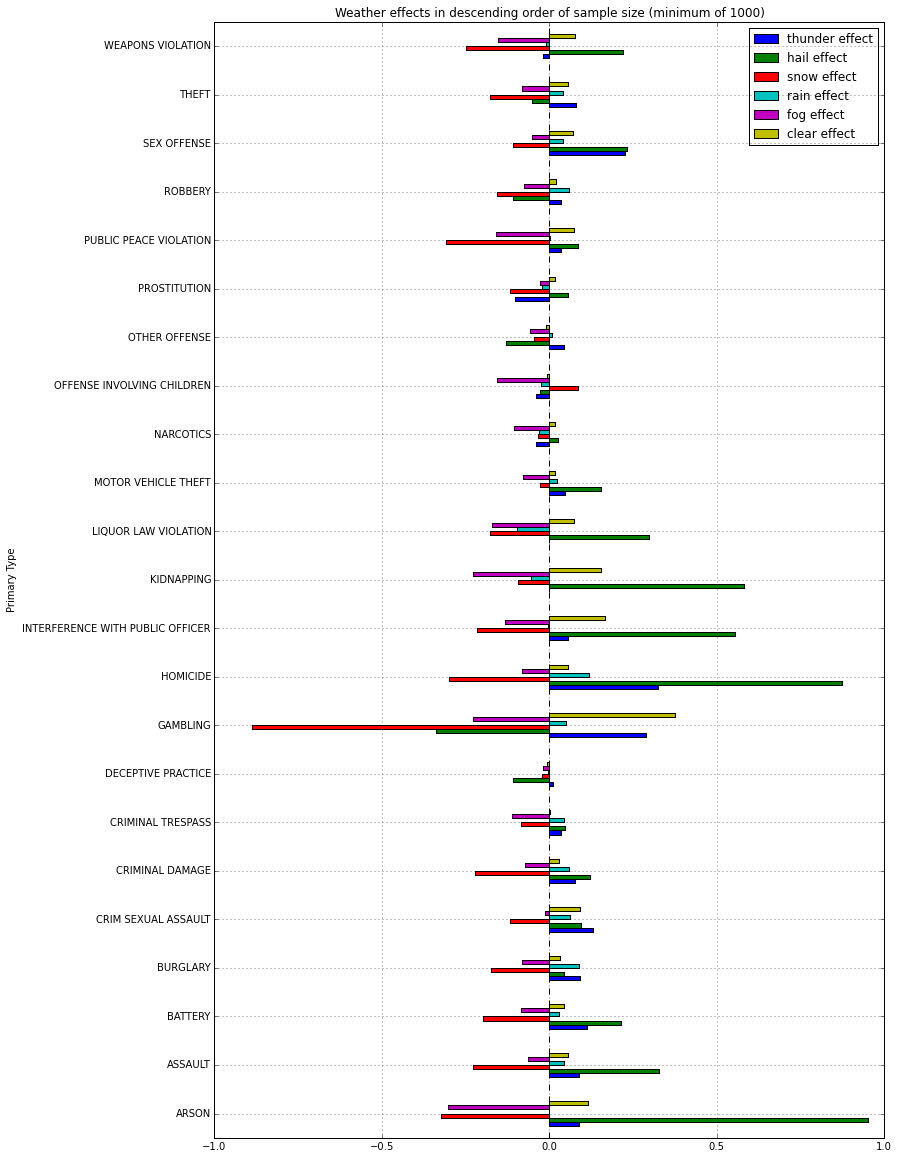

In [256]:
columns = [column for column in comparison_df_truncated.columns if column != 'sample size']
comparison_df_truncated[columns].plot(kind='barh', figsize=(12,20), 
                                      title='Weather effects in descending order of sample size (minimum of 1000)')

In [266]:
combined2 = combined.set_index(combined.Date)
combined2.head()

                  Date                     Block        Primary Type  \
Date                                                                   
2015-12-31  2015-12-31           025XX W 63RD ST  DECEPTIVE PRACTICE   
2015-12-31  2015-12-31       075XX S EMERALD AVE     CRIMINAL DAMAGE   
2015-12-31  2015-12-31        015XX N KEDZIE AVE               THEFT   
2015-12-31  2015-12-31  079XX S STONY ISLAND AVE             BATTERY   
2015-12-31  2015-12-31          037XX N CLARK ST             BATTERY   

                              Description     Location Description  ...    \
Date                                                                ...     
2015-12-31      THEFT BY LESSEE,MOTOR VEH                    OTHER  ...     
2015-12-31                     TO VEHICLE                   STREET  ...     
2015-12-31                  FROM BUILDING  RESIDENCE PORCH/HALLWAY  ...     
2015-12-31  AGGRAVATED: OTHER DANG WEAPON                   STREET  ...     
2015-12-31                       

In [267]:
# needed for representing dates and times
import datetime 
from datetime import datetime

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# matplotlib and inline graphics
import matplotlib.pyplot as plt
%matplotlib inline

In [268]:
len(combined2[(combined2["Date"] >= pd.datetime.date(datetime(2015,1,1)))])

260487

In [269]:
#Group all of the 2015 crimes by Event Type
gutcheck = combined2[['Date', 'Events']][(combined2["Date"] >= pd.datetime.date(datetime(2015,1,1)))].groupby(['Events'])
gutcheck.Events.count()

Events
Fog                        3674
Fog-Rain                   4115
Fog-Rain-Snow               697
Fog-Rain-Thunderstorm      5850
Fog-Snow                   5776
Rain                      50696
Rain-Hail-Thunderstorm      676
Rain-Snow                  3631
Rain-Thunderstorm         18053
Snow                      22678
Name: Events, dtype: int64

In [270]:
# combined2[['Date', 'Events']][(combined2["Date"] >= pd.datetime.date(datetime(2015,1,1))) & (combined2.Events=='Snow')].head()

# Show crimes by day for each snow day in 2015 to see where my data is wrong
gutcheck2 = combined2[['Date', 'Events']][(combined2["Date"] >= pd.datetime.date(datetime(2015,1,1))) \
        & (combined2.Events=='Snow')].groupby(['Date'])
print(gutcheck2.Events.count())

Date
2015-01-05    512
2015-01-06    496
2015-01-08    440
...
2015-12-18    635
2015-12-29    602
2015-12-31    593
Name: Events, Length: 37, dtype: int64


In [271]:
#Hack to get entire output
from pandas import DataFrame
from IPython.display import HTML
#HTML(DataFrame(myList).to_html())

#Group all of the crimes by Event Type
gutcheck = combined2[['Date', 'Events']].groupby(['Events'])
print(gutcheck.Events.count())
HTML(DataFrame(gutcheck.Events.count()).to_html())

Events
Fog              16126
Fog-Rain         12173
Fog-Rain-Snow     4553
...
Snow                 140420
Snow-Thunderstorm       693
Thunderstorm           5752
Name: Events, Length: 14, dtype: int64


,Events
Events,
Fog,16126
Fog-Rain,12173
Fog-Rain-Snow,4553
Fog-Rain-Snow-Thunderstorm,682
Fog-Rain-Thunderstorm,20342
Fog-Snow,17968
Rain,308561
Rain-Hail-Thunderstorm,2675
Rain-Snow,31640


In [272]:
#Group all of the crimes by date
gutcheck = combined2[['Date']].groupby(['Date'])
CrimesByDay = dict(gutcheck.Date.count())
print(CrimesByDay)

{datetime.date(2012, 11, 11): 884, datetime.date(2012, 11, 10): 976, datetime.date(2013, 11, 16): 762, datetime.date(2013, 11, 17): 740, datetime.date(2013, 11, 22): 849, datetime.date(2013, 11, 23): 669, datetime.date(2013, 11, 20): 867, datetime.date(2013, 11, 21): 863, datetime.date(2013, 11, 26): 830, datetime.date(2013, 11, 27): 731, datetime.date(2013, 11, 24): 640, datetime.date(2013, 11, 25): 678, datetime.date(2012, 11, 7): 875, datetime.date(2012, 11, 6): 784, datetime.date(2012, 11, 5): 888, datetime.date(2012, 11, 4): 731, datetime.date(2012, 11, 27): 806, datetime.date(2012, 11, 26): 798, datetime.date(2012, 11, 25): 813, datetime.date(2012, 11, 24): 838, datetime.date(2013, 11, 6): 784, datetime.date(2012, 11, 30): 990, datetime.date(2012, 11, 29): 915, datetime.date(2012, 11, 28): 858, datetime.date(2012, 11, 19): 865, datetime.date(2012, 11, 18): 848, datetime.date(2012, 11, 17): 872, datetime.date(2012, 11, 16): 941, datetime.date(2012, 11, 23): 788, datetime.date(2012

In [273]:
# Total Crimes
TotalCrimes = len(combined2)
print(TotalCrimes)

1528075


In [274]:
# of days
NumDays = len(gutcheck.Date)
print(NumDays)

1826


In [275]:
# Avg number of crimes per day
print(TotalCrimes / NumDays)

836.84282584885


In [276]:
XmasTotals = (CrimesByDay[pd.datetime.date(datetime(2011,12,25))]) +\
(CrimesByDay[pd.datetime.date(datetime(2012,12,25))]) +\
(CrimesByDay[pd.datetime.date(datetime(2013,12,25))]) +\
(CrimesByDay[pd.datetime.date(datetime(2014,12,25))]) +\
(CrimesByDay[pd.datetime.date(datetime(2015,12,25))])

print("Avg Xmas:",  XmasTotals / 5)

AXMasTotals = 0

for y in [2011, 2012, 2013, 2014, 2015]:
    for d in [22, 23, 24, 26, 27, 28]:
        print("Adding", y, 12, d)
        AXMasTotals += CrimesByDay[pd.datetime.date(datetime(y,12,d))]

print("Avg Around Xmas:", AXMasTotals / 30)

Avg Xmas: 478.2
Adding 2011 12 22
Adding 2011 12 23
Adding 2011 12 24
Adding 2011 12 26
Adding 2011 12 27
Adding 2011 12 28
Adding 2012 12 22
Adding 2012 12 23
Adding 2012 12 24
Adding 2012 12 26
Adding 2012 12 27
Adding 2012 12 28
Adding 2013 12 22
Adding 2013 12 23
Adding 2013 12 24
Adding 2013 12 26
Adding 2013 12 27
Adding 2013 12 28
Adding 2014 12 22
Adding 2014 12 23
Adding 2014 12 24
Adding 2014 12 26
Adding 2014 12 27
Adding 2014 12 28
Adding 2015 12 22
Adding 2015 12 23
Adding 2015 12 24
Adding 2015 12 26
Adding 2015 12 27
Adding 2015 12 28
Avg Around Xmas: 699.533333333


In [277]:
TGTotals = (CrimesByDay[pd.datetime.date(datetime(2011,11,24))]) +\
(CrimesByDay[pd.datetime.date(datetime(2012,11,22))]) +\
(CrimesByDay[pd.datetime.date(datetime(2013,11,28))]) +\
(CrimesByDay[pd.datetime.date(datetime(2014,11,27))]) +\
(CrimesByDay[pd.datetime.date(datetime(2015,11,26))])

print("Avg TGs:",  TGTotals / 5)

ATGTotals = 0
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2011,11,21))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2011,11,22))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2011,11,23))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2011,11,25))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2011,11,26))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2011,11,27))]

ATGTotals += CrimesByDay[pd.datetime.date(datetime(2012,11,19))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2012,11,20))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2012,11,21))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2012,11,23))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2012,11,24))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2012,11,25))]

ATGTotals += CrimesByDay[pd.datetime.date(datetime(2013,11,25))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2013,11,26))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2013,11,27))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2013,11,29))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2013,11,30))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2013,12,1))]

ATGTotals += CrimesByDay[pd.datetime.date(datetime(2014,11,24))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2014,11,25))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2014,11,26))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2014,11,28))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2014,11,29))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2014,11,30))]

ATGTotals += CrimesByDay[pd.datetime.date(datetime(2015,11,23))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2015,11,24))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2015,11,25))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2015,11,27))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2015,11,28))]
ATGTotals += CrimesByDay[pd.datetime.date(datetime(2015,11,29))]

print("Avg Around TG:", ATGTotals / 30)

Avg TGs: 594.6
Avg Around TG: 761.233333333


In [278]:
NYETotals = (CrimesByDay[pd.datetime.date(datetime(2011,12,31))]) +\
(CrimesByDay[pd.datetime.date(datetime(2012,12,31))]) +\
(CrimesByDay[pd.datetime.date(datetime(2013,12,31))]) +\
(CrimesByDay[pd.datetime.date(datetime(2014,12,31))]) +\
(CrimesByDay[pd.datetime.date(datetime(2015,12,31))])

print("Avg NYEs:",  NYETotals / 5)

ANYETotals = 0

for y in [2011, 2012, 2013, 2014]:
    for d in [28, 29, 30, 1, 2, 3]:
        if d > 20:
            m = 12
            yr = y
        else:
            m = 1
            yr = y + 1
            
        print("Adding", yr, m, d)
        ANYETotals += CrimesByDay[pd.datetime.date(datetime(yr,m,d))]
            
ANYETotals += CrimesByDay[pd.datetime.date(datetime(2015,12,25))]
ANYETotals += CrimesByDay[pd.datetime.date(datetime(2015,12,26))]
ANYETotals += CrimesByDay[pd.datetime.date(datetime(2015,12,27))]
ANYETotals += CrimesByDay[pd.datetime.date(datetime(2015,12,28))]
ANYETotals += CrimesByDay[pd.datetime.date(datetime(2015,12,29))]
ANYETotals += CrimesByDay[pd.datetime.date(datetime(2015,12,30))]

print("Avg Around NYEs:", ANYETotals / 30)


Avg NYEs: 651.0
Adding 2011 12 28
Adding 2011 12 29
Adding 2011 12 30
Adding 2012 1 1
Adding 2012 1 2
Adding 2012 1 3
Adding 2012 12 28
Adding 2012 12 29
Adding 2012 12 30
Adding 2013 1 1
Adding 2013 1 2
Adding 2013 1 3
Adding 2013 12 28
Adding 2013 12 29
Adding 2013 12 30
Adding 2014 1 1
Adding 2014 1 2
Adding 2014 1 3
Adding 2014 12 28
Adding 2014 12 29
Adding 2014 12 30
Adding 2015 1 1
Adding 2015 1 2
Adding 2015 1 3
Avg Around NYEs: 749.5


In [279]:
EasterTotals = (CrimesByDay[pd.datetime.date(datetime(2011,4,24))]) +\
(CrimesByDay[pd.datetime.date(datetime(2012,4,8))]) +\
(CrimesByDay[pd.datetime.date(datetime(2013,3,31))]) +\
(CrimesByDay[pd.datetime.date(datetime(2014,4,20))]) +\
(CrimesByDay[pd.datetime.date(datetime(2015,4,5))])

print("Avg Easters:",  EasterTotals / 5)

AEasterTotals = 0

AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2011,4,21))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2011,4,22))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2011,4,23))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2011,4,25))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2011,4,26))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2011,4,27))]

AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2012,4,5))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2012,4,6))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2012,4,7))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2012,4,9))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2012,4,10))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2012,4,11))]

AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2013,3,28))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2013,3,29))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2013,3,30))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2013,4,1))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2013,4,2))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2013,4,3))]

AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2014,4,17))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2014,4,18))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2014,4,19))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2014,4,21))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2014,4,22))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2014,4,23))]

AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2015,4,2))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2015,4,3))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2015,4,4))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2015,4,6))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2015,4,7))]
AEasterTotals += CrimesByDay[pd.datetime.date(datetime(2015,4,8))]

print("Avg Around Easters:",  AEasterTotals / 30)

Avg Easters: 758.2
Avg Around Easters: 830.333333333


In [280]:
HalloweenTotals = (CrimesByDay[pd.datetime.date(datetime(2011,10,31))]) +\
(CrimesByDay[pd.datetime.date(datetime(2012,10,31))]) +\
(CrimesByDay[pd.datetime.date(datetime(2013,10,31))]) +\
(CrimesByDay[pd.datetime.date(datetime(2014,10,31))]) +\
(CrimesByDay[pd.datetime.date(datetime(2015,10,31))])

print("Avg Halloweens:",  HalloweenTotals / 5)

Avg Halloweens: 887.4


In [281]:
J4Totals = (CrimesByDay[pd.datetime.date(datetime(2011,7,4))]) +\
(CrimesByDay[pd.datetime.date(datetime(2012,7,4))]) +\
(CrimesByDay[pd.datetime.date(datetime(2013,7,4))]) +\
(CrimesByDay[pd.datetime.date(datetime(2014,7,4))]) +\
(CrimesByDay[pd.datetime.date(datetime(2015,7,4))])

print("Avg J4s:",  J4Totals / 5)

Avg J4s: 939.4


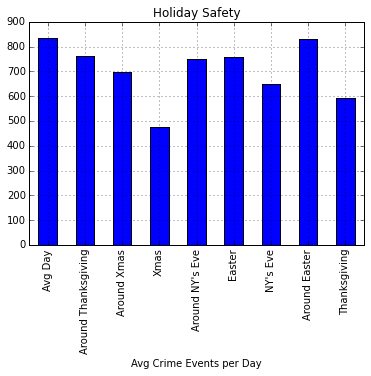

In [282]:
HolidaysDict = {}
HolidaysDict["Avg Day"] = TotalCrimes / NumDays
HolidaysDict["Xmas"] = XmasTotals / 5
HolidaysDict["Thanksgiving"] = TGTotals / 5
HolidaysDict["NY's Eve"] = NYETotals / 5
HolidaysDict["Easter"] = EasterTotals / 5

HolidaysDict["Around Xmas"] = AXMasTotals / 30
HolidaysDict["Around Thanksgiving"] = ATGTotals / 30
HolidaysDict["Around NY's Eve"] = ANYETotals / 30
HolidaysDict["Around Easter"] = AEasterTotals / 30

HolidaysDF = pd.DataFrame.from_dict(HolidaysDict, orient="index")
HolidaysDF.index.names = ['Avg Crime Events per Day']
HolidaysDF.plot(kind="bar", title='Holiday Safety', legend=False)


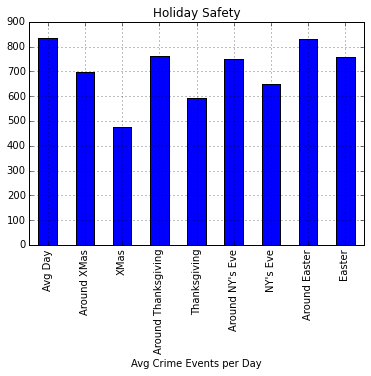

In [283]:
# Maybe a list of tuples can maintain its order
HolidaysList = []
HolidaysList.append(("Avg Day", TotalCrimes / NumDays))
HolidaysList.append(("Around XMas", AXMasTotals / 30))
HolidaysList.append(("Xmas", XmasTotals / 5))

HolidaysList.append(("Around Thanksgiving", ATGTotals / 30))
HolidaysList.append(("Thanksgiving", TGTotals / 5))
HolidaysList.append(("Around NY's Eve", ANYETotals / 30))
HolidaysList.append(("NY's Eve", NYETotals / 5))
HolidaysList.append(("Around Easter", AEasterTotals / 30))
HolidaysList.append(("Easter", EasterTotals / 5))

HolidaysDF = pd.DataFrame.from_records(HolidaysList, 
    index=["Avg Day", "Around XMas", "XMas", "Around Thanksgiving", \
    "Thanksgiving", "Around NY's Eve", "NY's Eve", "Around Easter", "Easter"], \
    columns=["Desc", "Crimes per Day"])
HolidaysDF.index.names = ['Avg Crime Events per Day']
HolidaysDF.plot(kind="bar", title='Holiday Safety', legend=False)

Date
2011-01-01    1477
2011-01-02     710
2011-01-03     884
...
2015-12-29    602
2015-12-30    593
2015-12-31    593
Name: Date, Length: 1826, dtype: int64


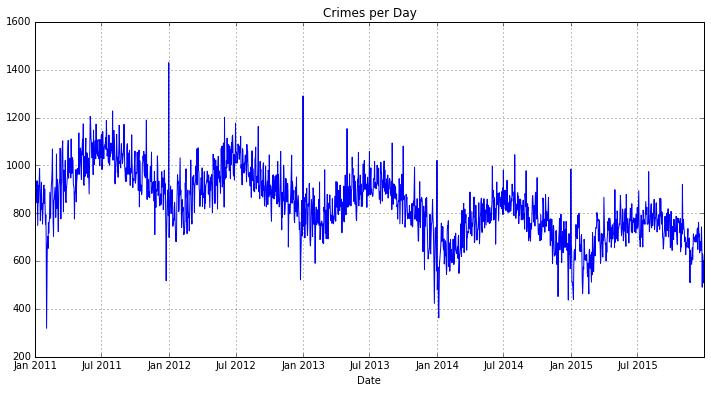

In [287]:
CrimeByDay = combined2[['Date']].groupby(['Date'])
CrimesByDaySeries = pd.Series(CrimeByDay.Date.count())
print(CrimesByDaySeries)
CrimesByDaySeries.plot(figsize=(12,6), title="Crimes per Day")

340766


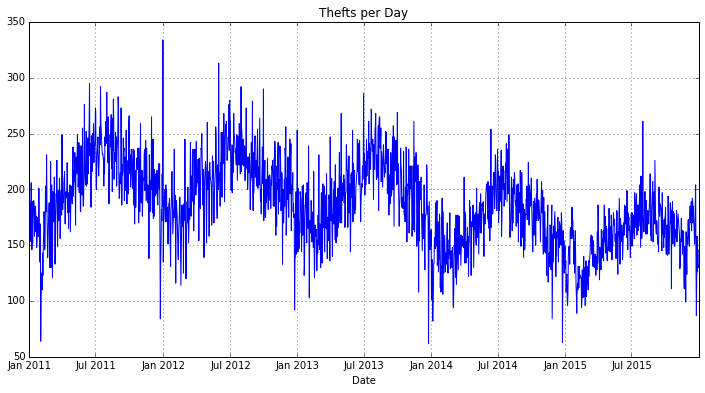

In [306]:
TheftsByDay = combined2[combined2['Primary Type']=='THEFT'][['Date']].groupby(['Date'])
TheftsByDaySeries = pd.Series(TheftsByDay.Date.count())
print(TheftsByDaySeries.sum())

TheftsByDaySeries.plot(figsize=(12,6), title="Thefts per Day")

271905


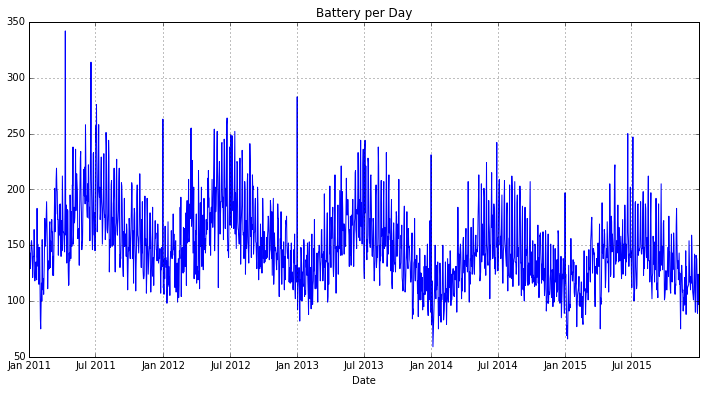

In [309]:
ByDay = combined2[combined2['Primary Type']=='BATTERY'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Battery per Day")

160484


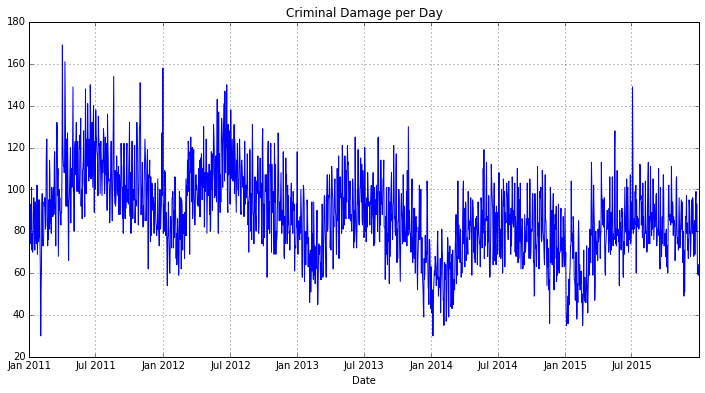

In [310]:
ByDay = combined2[combined2['Primary Type']=='CRIMINAL DAMAGE'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Criminal Damage per Day")

159520


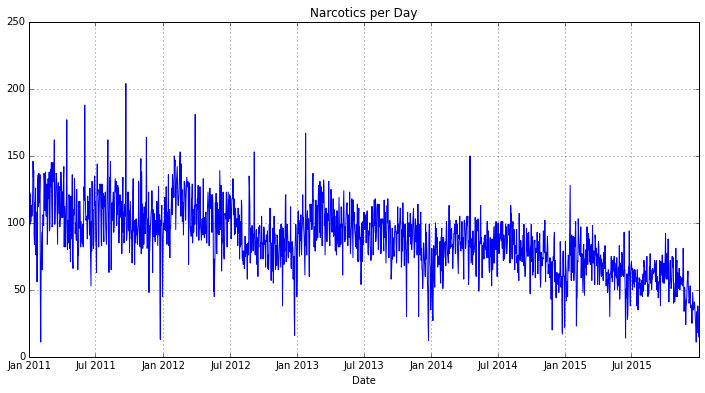

In [311]:
ByDay = combined2[combined2['Primary Type']=='NARCOTICS'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Narcotics per Day")

95077


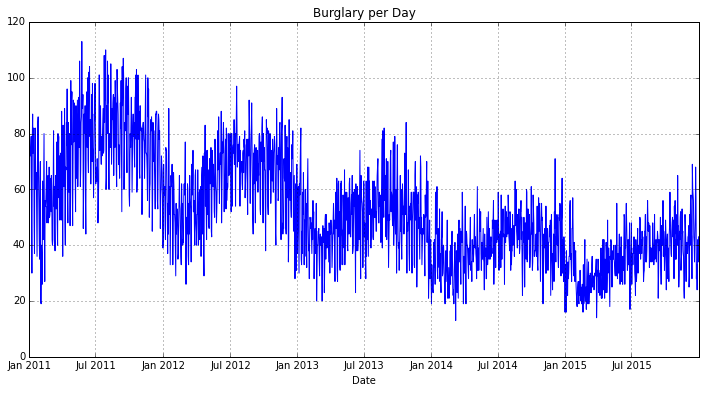

In [312]:
ByDay = combined2[combined2['Primary Type']=='BURGLARY'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Burglary per Day")

92196


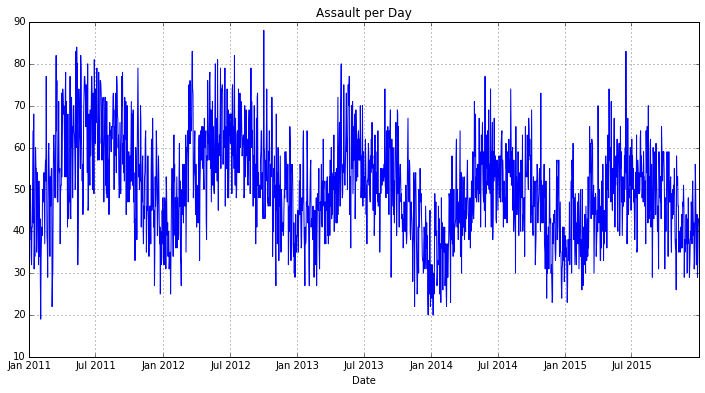

In [313]:
ByDay = combined2[combined2['Primary Type']=='ASSAULT'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Assault per Day")

68864


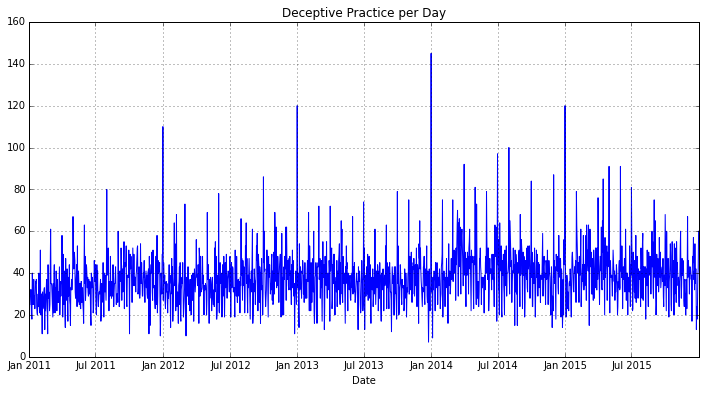

In [314]:
ByDay = combined2[combined2['Primary Type']=='DECEPTIVE PRACTICE'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Deceptive Practice per Day")

68470


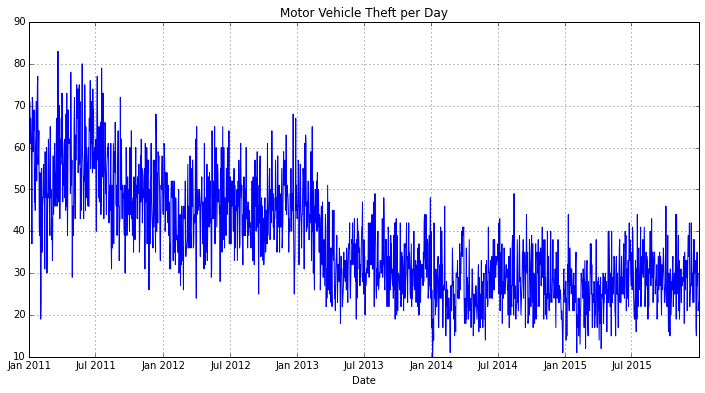

In [315]:
ByDay = combined2[combined2['Primary Type']=='MOTOR VEHICLE THEFT'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Motor Vehicle Theft per Day")

58731


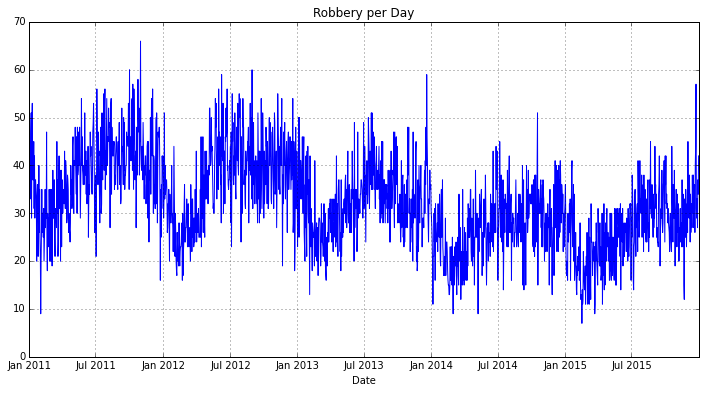

In [316]:
ByDay = combined2[combined2['Primary Type']=='ROBBERY'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Robbery per Day")

38943


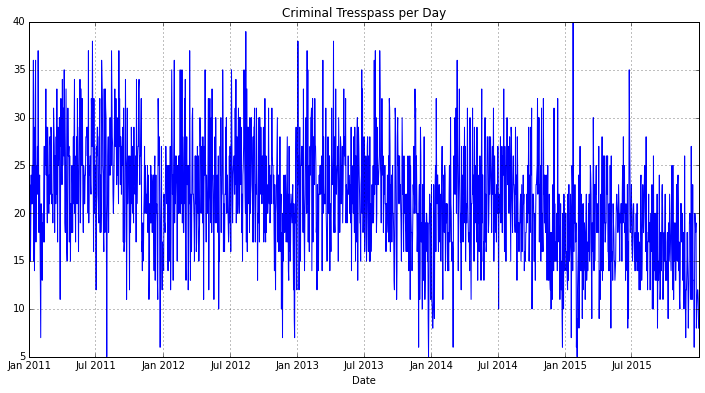

In [317]:
ByDay = combined2[combined2['Primary Type']=='CRIMINAL TRESPASS'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Criminal Tresspass per Day")

17484


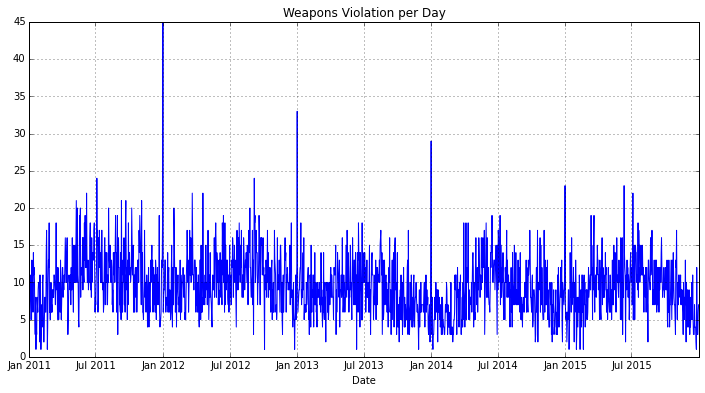

In [319]:
ByDay = combined2[combined2['Primary Type']=='WEAPONS VIOLATION'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Weapons Violation per Day")


14558


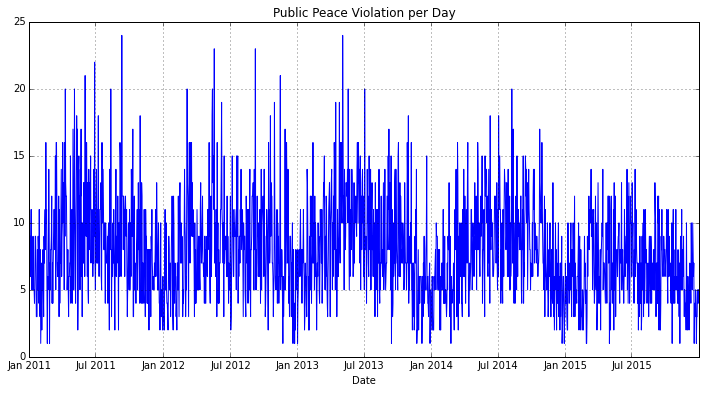

In [320]:
ByDay = combined2[combined2['Primary Type']=='PUBLIC PEACE VIOLATION'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Public Peace Violation per Day")

11274


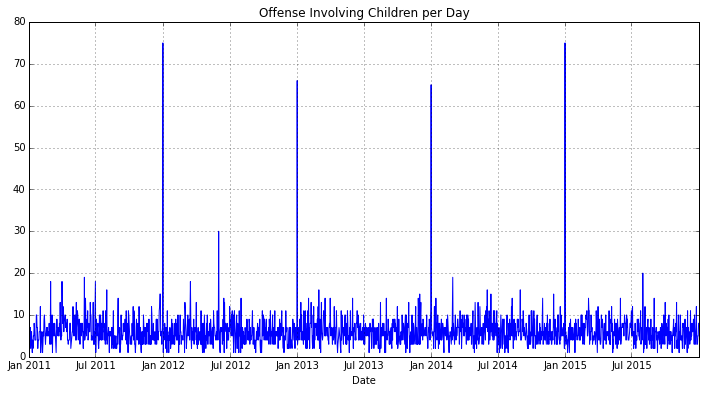

In [322]:
ByDay = combined2[combined2['Primary Type']=='OFFENSE INVOLVING CHILDREN'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Offense Involving Children per Day")

9224


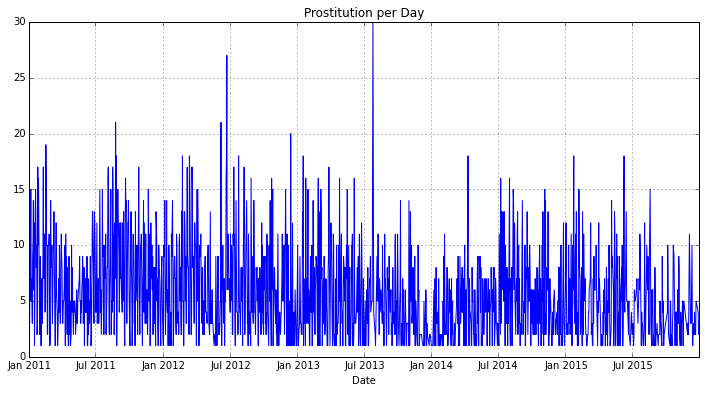

In [323]:
ByDay = combined2[combined2['Primary Type']=='PROSTITUTION'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Prostitution per Day")

6680


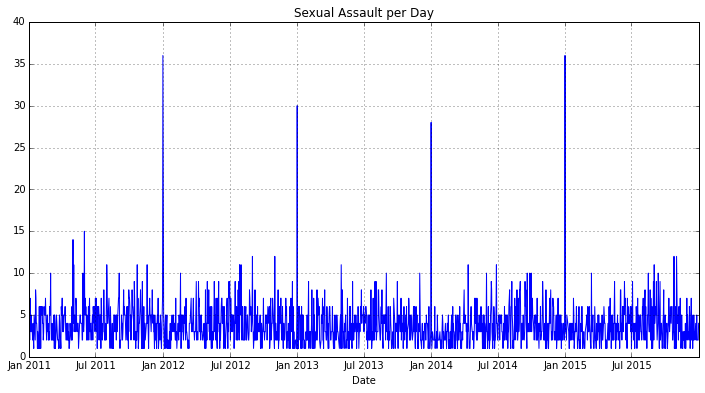

In [324]:
ByDay = combined2[combined2['Primary Type']=='CRIM SEXUAL ASSAULT'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Sexual Assault per Day")

6263


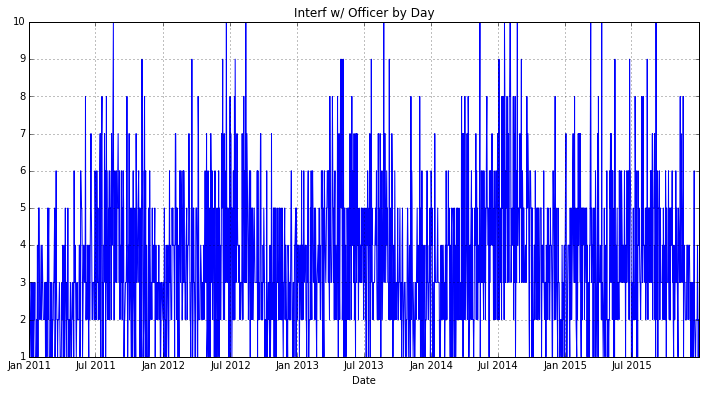

In [325]:
ByDay = combined2[combined2['Primary Type']=='INTERFERENCE WITH PUBLIC OFFICER'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Interf w/ Officer by Day")

4936


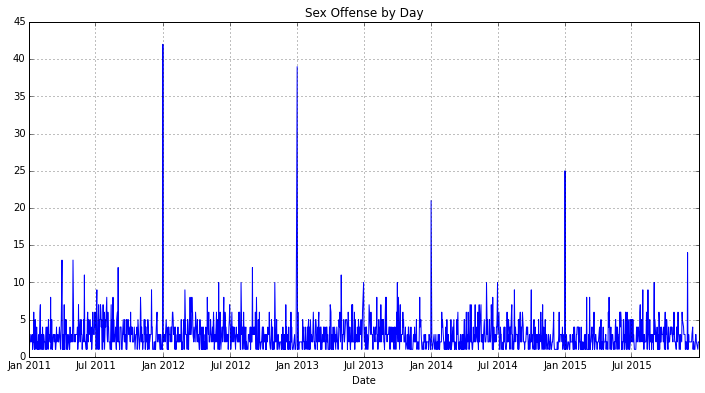

In [326]:
ByDay = combined2[combined2['Primary Type']=='SEX OFFENSE'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Sex Offense by Day")

2759


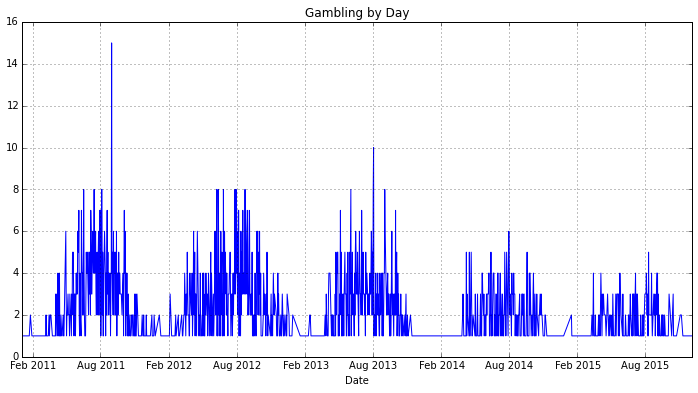

In [327]:
ByDay = combined2[combined2['Primary Type']=='GAMBLING'][['Date']].groupby(['Date'])
ByDaySeries = pd.Series(ByDay.Date.count())
print(ByDaySeries.sum())

ByDaySeries.plot(figsize=(12,6), title="Gambling by Day")